In [1]:
import pandas as pd
import scanpy as sc
import anndata as ad
import os
import numpy as np

In [2]:
scdir = '/home/jing/Phd_project/project_UCD_blca/blca_publication_OUTPUT/blca_publication_OUTPUT_sctransform'

In [3]:
mtx =os.path.join(scdir,"blca_scR_corrected_UMI.mtx")
cells=pd.read_csv(os.path.join(scdir,"blca_scR_corrected_UMI_cells.txt"),header=None,index_col=0)
features=pd.read_csv(os.path.join(scdir,'blca_scR_corrected_UMI_genes.txt'),header=None,sep='\t',index_col=0)
adata = sc.read_mtx(mtx)


In [4]:
adata.obs['CellID']= cells.index.tolist()
adata.var['Gene']= features.index.tolist()
adata.var.index= adata.var['Gene']
display(adata)
print(f'Max val of sct matrix before transformation, {np.max(adata.X)}')

AnnData object with n_obs × n_vars = 28383 × 20047
    obs: 'CellID'
    var: 'Gene'

Max val of sct matrix before transformation, 9.23405647277832


In [5]:
adata.obs.set_index(adata.obs['CellID'],inplace=True)

In [6]:
adata.var_names_make_unique()

# Check values before transformation
print(f'Max val of UMI matrix before transformation: {np.max(adata.X)}')

# Normalize & log-transform
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata, base=2)

Max val of UMI matrix before transformation: 9.23405647277832


In [7]:
adata.obs

,CellID
CellID,
GSM4006644_BC1_AAACCTGAGAAGAAGC.1,GSM4006644_BC1_AAACCTGAGAAGAAGC.1
GSM4006644_BC1_AAACCTGAGCTACCTA.1,GSM4006644_BC1_AAACCTGAGCTACCTA.1
GSM4006644_BC1_AAACCTGCACGGCGTT.1,GSM4006644_BC1_AAACCTGCACGGCGTT.1
GSM4006644_BC1_AAACCTGCATCTCGCT.1,GSM4006644_BC1_AAACCTGCATCTCGCT.1
GSM4006644_BC1_AAACCTGTCAGGCCCA.1,GSM4006644_BC1_AAACCTGTCAGGCCCA.1
...,...
GSM4751268_BC7_TTTGTCAGTACAGACG.1,GSM4751268_BC7_TTTGTCAGTACAGACG.1
GSM4751268_BC7_TTTGTCAGTCTAGTCA.1,GSM4751268_BC7_TTTGTCAGTCTAGTCA.1
GSM4751268_BC7_TTTGTCAGTGGCCCTA.1,GSM4751268_BC7_TTTGTCAGTGGCCCTA.1


### Anno

In [17]:
adata_non_immune = sc.read_h5ad('/home/jing/Phd_project/project_UCD_blca/blca_publication_OUTPUT/blca_nm_OUTPUT_non_immune_scvi.h5ad')
adata_non_immune.obs

,CellID,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,source,_scvi_batch,_scvi_labels,leiden
AAACCTGAGAAGAAGC.1-GSM4006644_BC1,AAACCTGAGAAGAAGC.1,5037,5037,29207,1799,6.159482,GSM4006644_BC1,0,0,5
AAACCTGAGCTACCTA.1-GSM4006644_BC1,AAACCTGAGCTACCTA.1,2769,2769,12115,392,3.235658,GSM4006644_BC1,0,0,2
AAACCTGCACGGCGTT.1-GSM4006644_BC1,AAACCTGCACGGCGTT.1,4385,4385,23784,1480,6.222671,GSM4006644_BC1,0,0,2
AAACCTGCATCTCGCT.1-GSM4006644_BC1,AAACCTGCATCTCGCT.1,4337,4337,17372,248,1.427585,GSM4006644_BC1,0,0,4
AAACCTGTCAGGCCCA.1-GSM4006644_BC1,AAACCTGTCAGGCCCA.1,3700,3700,19616,368,1.876020,GSM4006644_BC1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTACAGACG.1-GSM4751268_BC7,TTTGTCAGTACAGACG.1,1859,1859,6857,475,6.927228,GSM4751268_BC7,4,0,0
TTTGTCAGTCTAGTCA.1-GSM4751268_BC7,TTTGTCAGTCTAGTCA.1,1420,1420,4543,333,7.329958,GSM4751268_BC7,4,0,0
TTTGTCAGTGGCCCTA.1-GSM4751268_BC7,TTTGTCAGTGGCCCTA.1,4206,4206,21459,1849,8.616431,GSM4751268_BC7,4,0,2
TTTGTCAGTTCTGGTA.1-GSM4751268_BC7,TTTGTCAGTTCTGGTA.1,2581,2581,10731,909,8.470786,GSM4751268_BC7,4,0,1


In [18]:
adata_non_immune.obs['swapped'] = np.array(['{}_{}'.format(b, a) for a, b in (s.split('-') for s in adata_non_immune.obs.index)])

In [21]:
adata.obs= adata.obs.merge(adata_non_immune.obs[['swapped','source','leiden']],left_index=True,right_on='swapped',how='left')

In [22]:
adata.obs

,CellID,swapped,source,leiden
AAACCTGAGAAGAAGC.1-GSM4006644_BC1,GSM4006644_BC1_AAACCTGAGAAGAAGC.1,GSM4006644_BC1_AAACCTGAGAAGAAGC.1,GSM4006644_BC1,5
AAACCTGAGCTACCTA.1-GSM4006644_BC1,GSM4006644_BC1_AAACCTGAGCTACCTA.1,GSM4006644_BC1_AAACCTGAGCTACCTA.1,GSM4006644_BC1,2
AAACCTGCACGGCGTT.1-GSM4006644_BC1,GSM4006644_BC1_AAACCTGCACGGCGTT.1,GSM4006644_BC1_AAACCTGCACGGCGTT.1,GSM4006644_BC1,2
AAACCTGCATCTCGCT.1-GSM4006644_BC1,GSM4006644_BC1_AAACCTGCATCTCGCT.1,GSM4006644_BC1_AAACCTGCATCTCGCT.1,GSM4006644_BC1,4
AAACCTGTCAGGCCCA.1-GSM4006644_BC1,GSM4006644_BC1_AAACCTGTCAGGCCCA.1,GSM4006644_BC1_AAACCTGTCAGGCCCA.1,GSM4006644_BC1,1
...,...,...,...,...
TTTGTCAGTACAGACG.1-GSM4751268_BC7,GSM4751268_BC7_TTTGTCAGTACAGACG.1,GSM4751268_BC7_TTTGTCAGTACAGACG.1,GSM4751268_BC7,0
TTTGTCAGTCTAGTCA.1-GSM4751268_BC7,GSM4751268_BC7_TTTGTCAGTCTAGTCA.1,GSM4751268_BC7_TTTGTCAGTCTAGTCA.1,GSM4751268_BC7,0
TTTGTCAGTGGCCCTA.1-GSM4751268_BC7,GSM4751268_BC7_TTTGTCAGTGGCCCTA.1,GSM4751268_BC7_TTTGTCAGTGGCCCTA.1,GSM4751268_BC7,2
TTTGTCAGTTCTGGTA.1-GSM4751268_BC7,GSM4751268_BC7_TTTGTCAGTTCTGGTA.1,GSM4751268_BC7_TTTGTCAGTTCTGGTA.1,GSM4751268_BC7,1


In [25]:
wkdir= "/home/jing/Phd_project/project_UCD_blca/blca_publication_OUTPUT/blca_publication_OUTPUT_LINCS/"
data_year = "2020"
cell_name = "BC3C"

data_dir = os.path.join(wkdir,"00_outputs_" + data_year + "_" + cell_name)
data_file = os.path.join(data_dir, "Data_norm_" + data_year + "_" + cell_name+ ".xlsx")
Data_norm = pd.read_excel(data_file, index_col = 0)
display(Data_norm)

genes_list = Data_norm.columns.to_list()
print("Landmark genes in LINCS data:", len(genes_list), genes_list)

,AARS,ABCB6,ABCC5,ABCF1,ABCF3,ABHD4,ABHD6,ABL1,ACAA1,ACAT2,...,ZMIZ1,ZMYM2,ZNF131,ZNF274,ZNF318,ZNF395,ZNF451,ZNF586,ZNF589,ZW10
ASG002_BC3C_24H:A03,-0.191254,-0.055246,0.039596,-0.256266,-0.040419,-0.590523,-0.159396,-0.074319,0.457981,0.409608,...,0.543203,0.494266,-0.011923,-0.225931,0.285054,-0.775246,0.166031,-0.024873,0.238723,0.284204
ASG002_BC3C_24H:A04,-0.265754,-0.317496,0.118696,-0.136665,-0.301569,-0.403023,0.124804,-0.036470,0.311931,0.660457,...,-0.565096,-0.088634,0.122977,-0.047931,0.141804,0.129054,-0.028819,-0.028773,-0.253627,-0.752646
ASG002_BC3C_24H:A05,-0.181954,-0.081597,-0.210304,1.559535,-0.019019,-0.457423,0.071404,0.074080,-0.356119,0.498808,...,0.226104,-0.228034,-0.121023,-0.075331,-0.133146,0.355054,0.022831,-0.084073,0.283123,-0.894896
ASG002_BC3C_24H:A06,0.033446,0.042404,-0.150154,-0.093165,0.053180,-0.053823,0.087704,0.167681,-0.601569,0.383308,...,-0.608596,-0.228835,0.072777,0.082970,-0.570996,2.847754,-0.211670,-0.067273,0.081723,0.338704
ASG002_BC3C_24H:J13,0.204446,0.180704,0.089096,-0.054666,0.053381,0.044877,-0.277396,-0.157419,0.535681,-3.933493,...,-0.318397,0.122265,-0.134323,-0.088931,-0.067996,-0.515847,-0.005069,0.067527,0.002223,0.204904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MOAR012_BC3C_24H:P20,0.647151,0.211700,-0.979200,0.597350,-0.375751,0.388300,0.394524,0.120151,-0.166775,-1.129125,...,-1.598475,-0.552750,0.515151,0.120800,0.082675,0.529700,0.383225,-0.207225,2.268450,-1.248500
MOAR012_BC3C_24H:P21,0.171800,0.046300,-0.145550,-0.295150,0.030849,0.420951,0.222075,0.179800,0.274724,-0.423975,...,-1.650575,0.203600,-0.003250,-0.064800,-0.037675,0.076499,0.201825,0.416875,0.287450,-0.971700
MOAR012_BC3C_24H:P22,0.648700,0.058749,-0.031700,0.408249,-0.753950,0.332200,-0.357525,-0.107650,-0.213575,0.074225,...,0.127625,0.031600,0.103250,-0.249600,0.046375,1.486200,0.440325,0.090075,-0.031650,-0.944300
MOAR012_BC3C_24H:P23,0.090499,-0.469300,-0.611800,0.873550,-0.788450,-0.097199,-0.366575,-0.490600,-0.624675,-0.009275,...,0.054676,-0.596050,0.084600,0.444700,0.431375,-0.921501,0.044926,0.716076,-0.000900,-1.106700


Landmark genes in LINCS data: 978 ['AARS', 'ABCB6', 'ABCC5', 'ABCF1', 'ABCF3', 'ABHD4', 'ABHD6', 'ABL1', 'ACAA1', 'ACAT2', 'ACBD3', 'ACD', 'ACLY', 'ACOT9', 'ADAM10', 'ADAT1', 'ADGRE5', 'ADGRG1', 'ADH5', 'ADI1', 'ADO', 'ADRB2', 'AGL', 'AKAP8', 'AKAP8L', 'AKR7A2', 'AKT1', 'ALAS1', 'ALDH7A1', 'ALDOA', 'ALDOC', 'AMDHD2', 'ANKRD10', 'ANO10', 'ANXA7', 'APBB2', 'APOE', 'APP', 'APPBP2', 'ARFIP2', 'ARHGAP1', 'ARHGEF12', 'ARHGEF2', 'ARID4B', 'ARID5B', 'ARL4C', 'ARNT2', 'ARPP19', 'ASAH1', 'ASCC3', 'ATF1', 'ATF5', 'ATF6', 'ATG3', 'ATMIN', 'ATP11B', 'ATP1B1', 'ATP2C1', 'ATP6V0B', 'ATP6V1D', 'AURKA', 'AURKB', 'AXIN1', 'B4GAT1', 'BACE2', 'BAD', 'BAG3', 'BAMBI', 'BAX', 'BCL2', 'BCL7B', 'BDH1', 'BECN1', 'BHLHE40', 'BID', 'BIRC2', 'BIRC5', 'BLCAP', 'BLMH', 'BLVRA', 'BMP4', 'BNIP3', 'BNIP3L', 'BPHL', 'BRCA1', 'BTK', 'BUB1B', 'BZW2', 'C2CD2', 'C2CD2L', 'C2CD5', 'C5', 'CAB39', 'CALM3', 'CALU', 'CAMSAP2', 'CANT1', 'CAPN1', 'CARMIL1', 'CASC3', 'CASK', 'CASP10', 'CASP2', 'CASP3', 'CASP7', 'CAST', 'CAT', 'CBLB

In [26]:
adata_lincs = adata[:, adata.var.index.isin(genes_list)]

/home/jing/miniforge3/envs/cstar/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:645: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/jing/miniforge3/envs/cstar/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/jing/miniforge3/envs/cstar/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


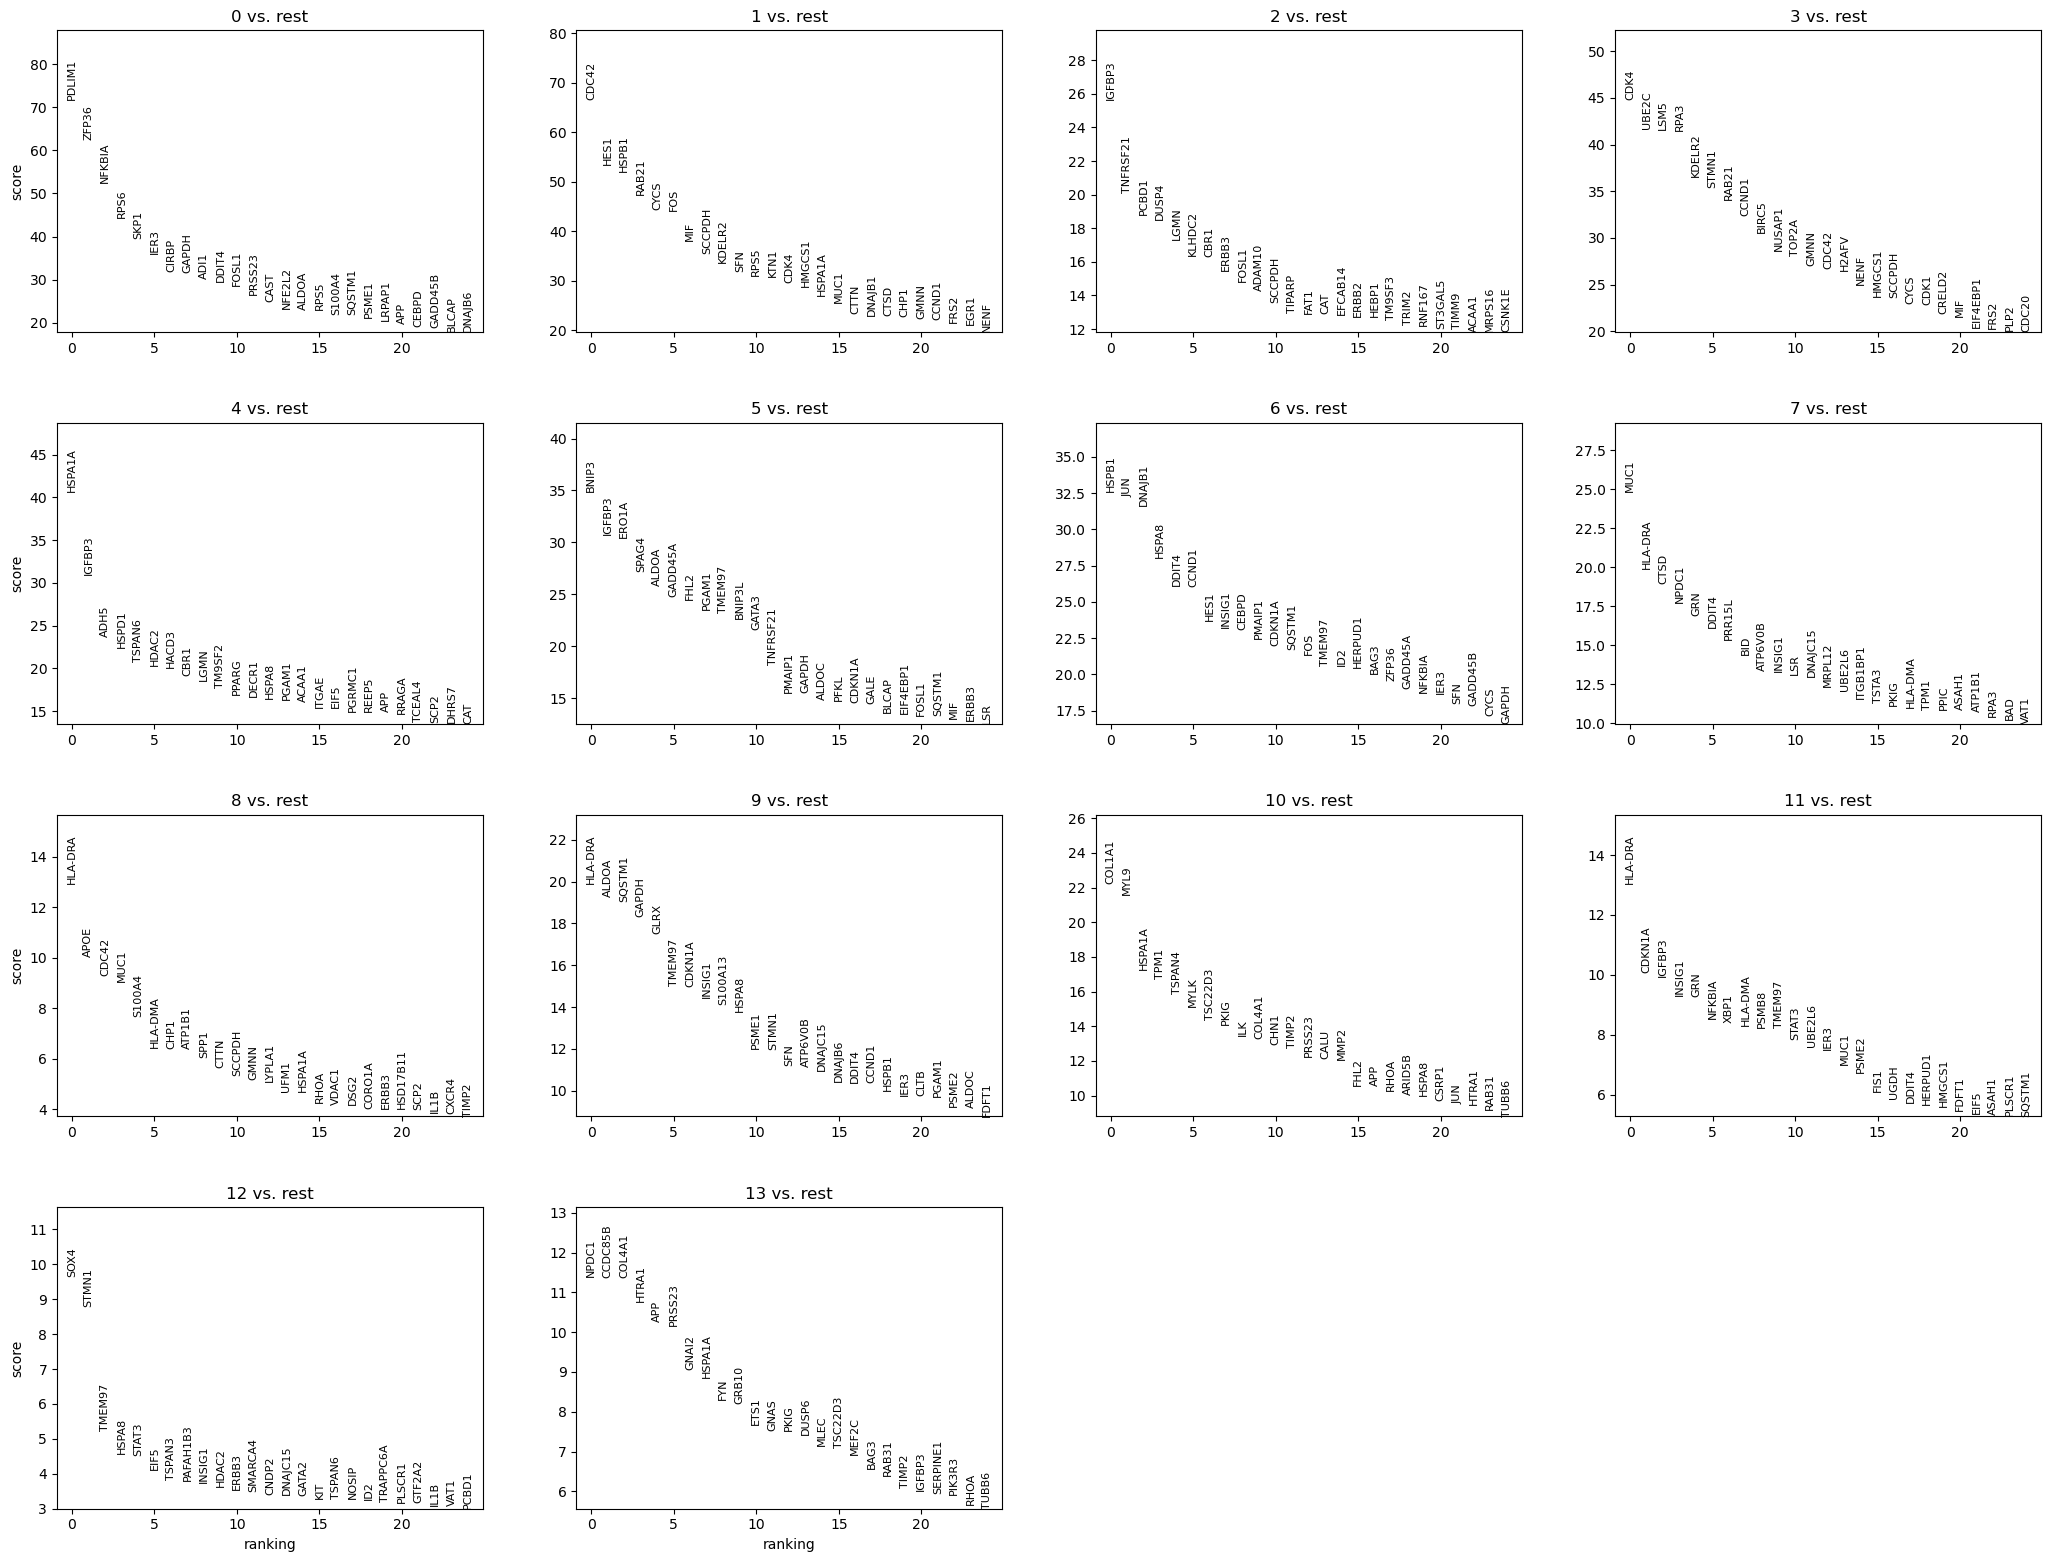

In [27]:
sc.tl.rank_genes_groups(adata_lincs, "leiden", method="wilcoxon")
sc.pl.rank_genes_groups(adata_lincs, n_genes=25, sharey=False)

In [29]:
adata_lincs.obs['leiden_target'] = adata_lincs.obs['leiden']

In [33]:
adata_lincs.obs['leiden_target'] 

AAACCTGAGAAGAAGC.1-GSM4006644_BC1    5
AAACCTGAGCTACCTA.1-GSM4006644_BC1    2
AAACCTGCACGGCGTT.1-GSM4006644_BC1    2
AAACCTGCATCTCGCT.1-GSM4006644_BC1    4
AAACCTGTCAGGCCCA.1-GSM4006644_BC1    1
                                    ..
TTTGTCAGTACAGACG.1-GSM4751268_BC7    0
TTTGTCAGTCTAGTCA.1-GSM4751268_BC7    0
TTTGTCAGTGGCCCTA.1-GSM4751268_BC7    2
TTTGTCAGTTCTGGTA.1-GSM4751268_BC7    1
TTTGTCATCAACCATG.1-GSM4751268_BC7    2
Name: leiden_target, Length: 28383, dtype: category
Categories (14, object): ['0', '1', '2', '3', ..., '10', '11', '12', '13']

In [36]:
adata_lincs.obs['leiden_target'] = adata_lincs.obs['leiden_target'].cat.add_categories(['Basal_T1'])
adata_lincs.obs.loc[(adata_lincs.obs['leiden_target'] == '1') & (adata_lincs.obs['source'] == 'GSM4006647_BC4'), 'leiden_target'] = 'Basal_T1'


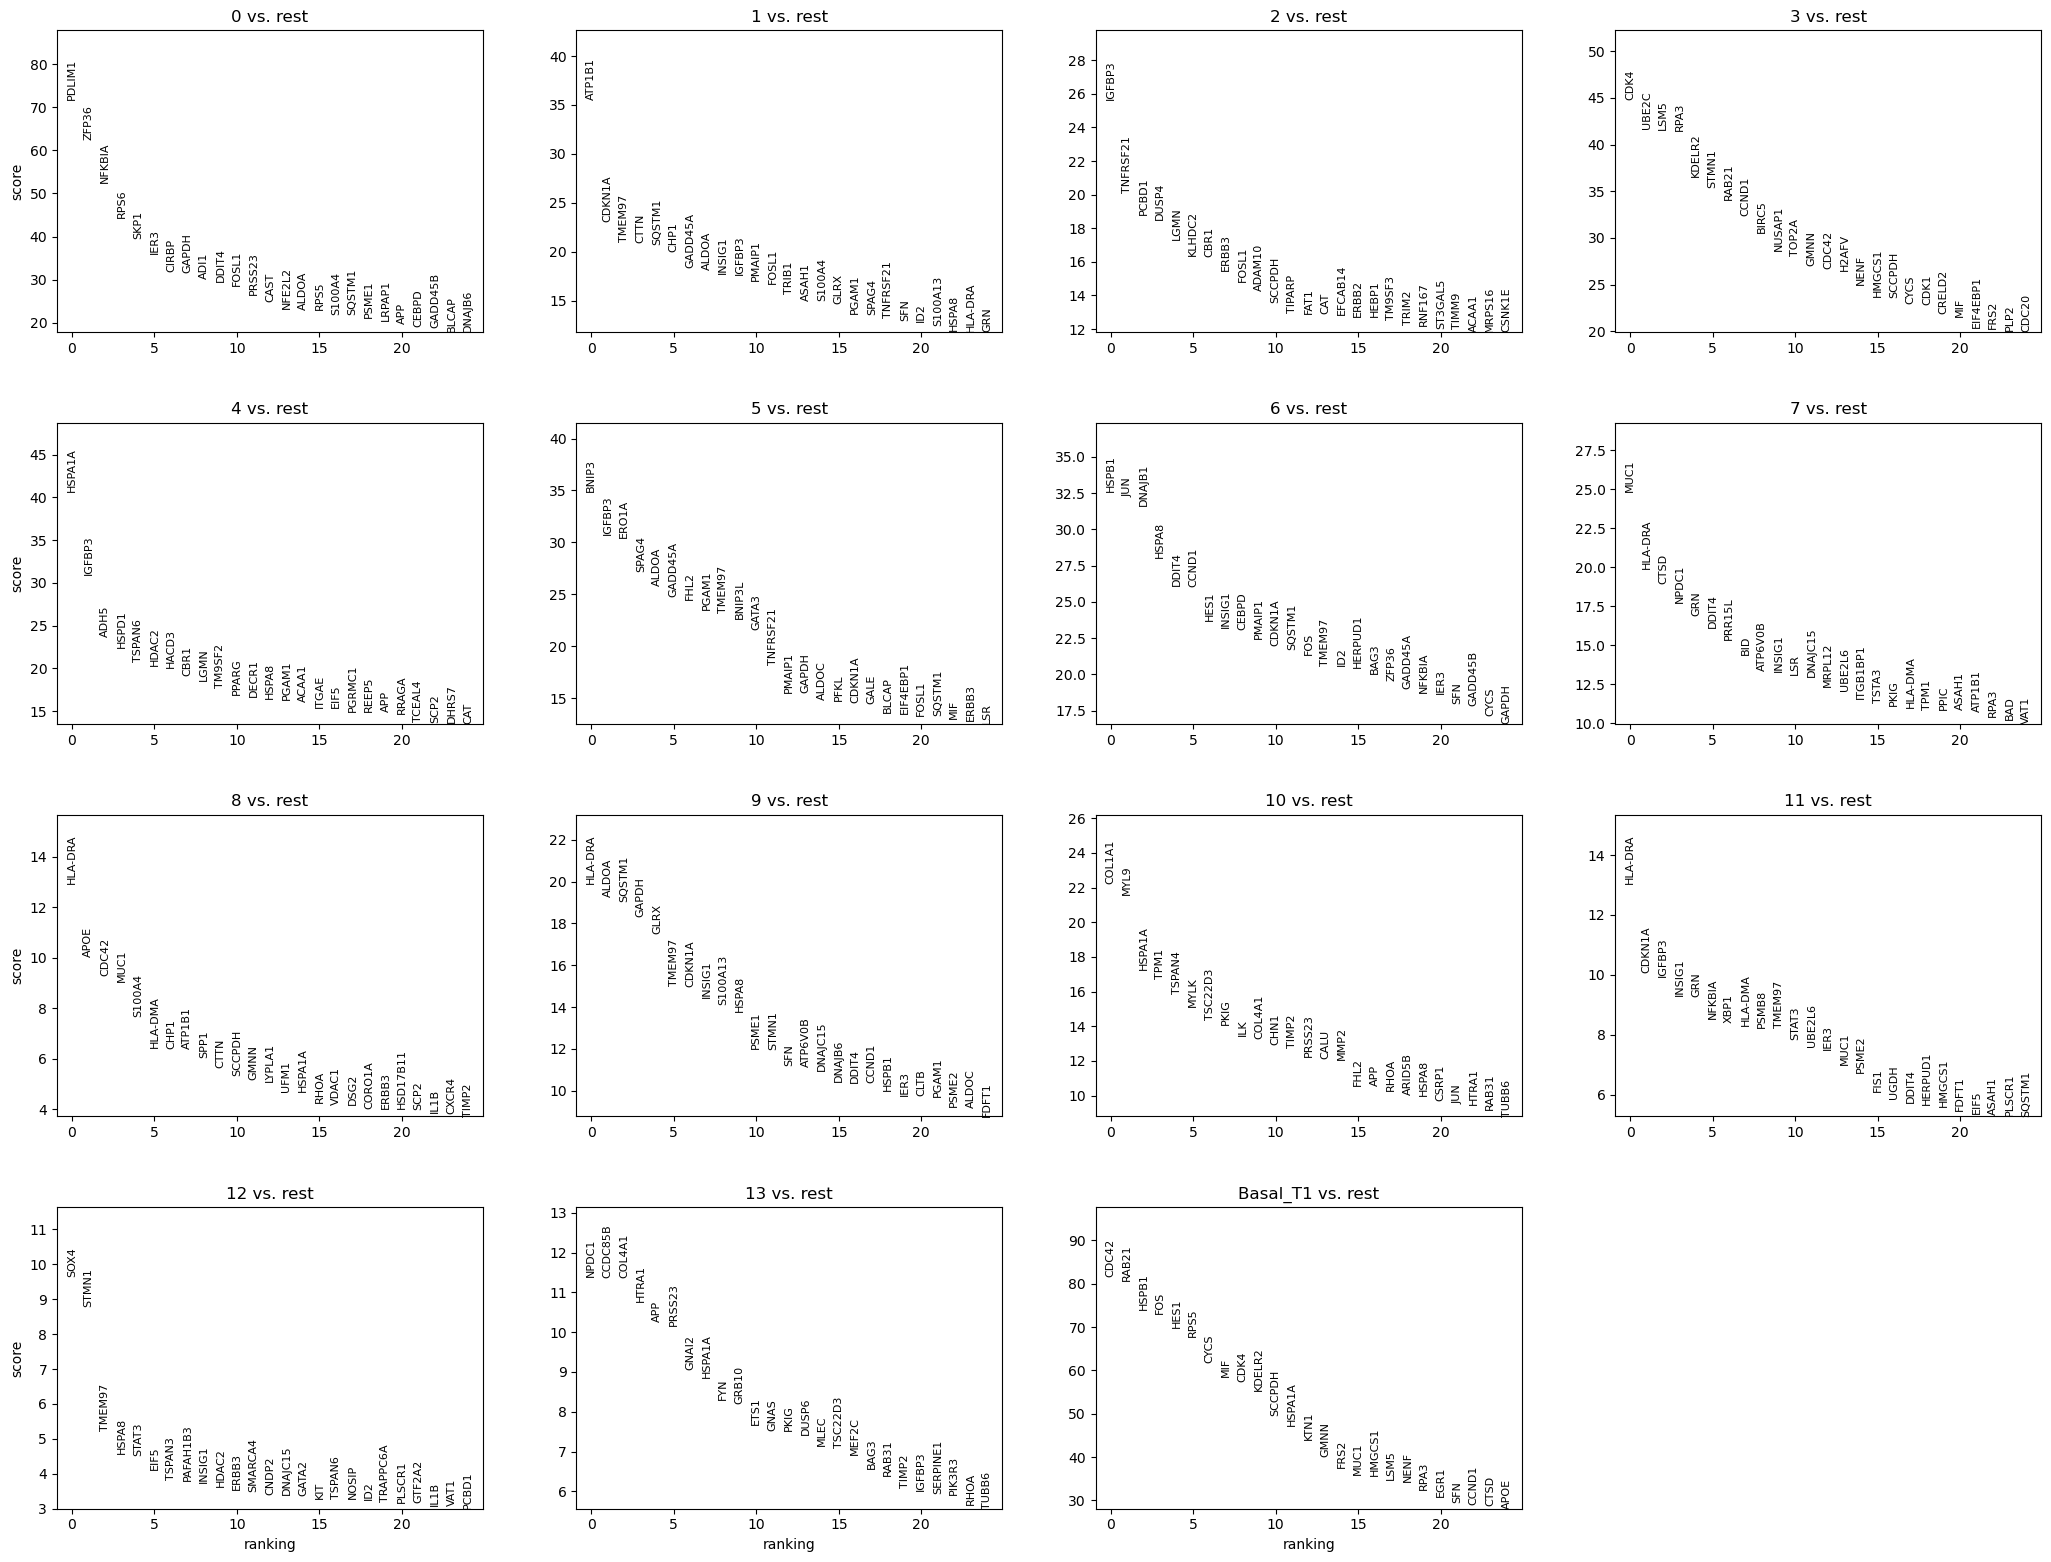

In [39]:
sc.tl.rank_genes_groups(adata_lincs, "leiden_target", method="wilcoxon")
sc.pl.rank_genes_groups(adata_lincs, n_genes=25, sharey=False)

In [45]:
result = adata_lincs.uns["rank_genes_groups"]
groups = result["names"].dtype.names
df = pd.DataFrame(
    {
        f"{group}_{key}": result[key][group]
        for group in groups
        for key in ["names", 'logfoldchanges',"pvals"]
    }
)

In [53]:
df[['Basal_T1_names','Basal_T1_logfoldchanges']]

,0_names,0_logfoldchanges,0_pvals,1_names,1_logfoldchanges,1_pvals,2_names,2_logfoldchanges,2_pvals,3_names,...,11_pvals,12_names,12_logfoldchanges,12_pvals,13_names,13_logfoldchanges,13_pvals,Basal_T1_names,Basal_T1_logfoldchanges,Basal_T1_pvals
0,PDLIM1,1.347227,0.000000e+00,ATP1B1,1.382374,2.854175e-276,IGFBP3,0.893678,6.146320e-145,CDK4,...,9.546452e-39,SOX4,1.869415,5.079161e-22,NPDC1,4.033239,4.449450e-30,CDC42,2.261291,0.0
1,ZFP36,0.990497,0.000000e+00,CDKN1A,0.610924,7.352485e-117,TNFRSF21,0.721660,1.311244e-89,UBE2C,...,8.958385e-24,STMN1,1.993074,1.798488e-18,CCDC85B,3.180723,5.856234e-30,RAB21,4.021003,0.0
2,NFKBIA,0.919257,0.000000e+00,TMEM97,0.913992,7.591527e-98,PCBD1,0.601192,9.503154e-79,LSM5,...,2.838914e-23,TMEM97,1.366856,1.659938e-07,COL4A1,8.843256,6.885246e-30,HSPB1,0.774415,0.0
3,RPS6,0.247192,0.000000e+00,CTTN,0.873027,7.429052e-97,DUSP4,0.852695,1.789811e-76,RPA3,...,1.472313e-20,HSPA8,0.614727,4.731126e-06,HTRA1,5.939863,5.085561e-27,FOS,1.277003,0.0
4,SKP1,0.432365,0.000000e+00,SQSTM1,0.594827,6.393109e-95,LGMN,0.793101,5.426034e-67,KDELR2,...,1.837826e-20,STAT3,1.482302,6.400376e-06,APP,2.851426,1.040837e-24,HES1,1.273816,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,GMNN,-1.831181,2.257699e-210,LSM5,-0.366318,2.388176e-37,JUN,-0.470532,1.999107e-170,ZFP36,...,1.198859e-11,CD44,-2.959577,1.330721e-05,MIF,-0.746346,1.899576e-07,GLRX,-4.565172,0.0
948,MUC1,-2.802448,1.191197e-221,FOS,-0.208659,2.135953e-47,GAPDH,-0.119578,7.647823e-173,IGFBP3,...,4.801844e-13,SFN,-0.949375,1.290863e-05,NENF,-1.731156,1.667791e-07,DDIT4,-2.604611,0.0
949,KDELR2,-0.931112,3.025640e-278,RAB21,-1.486684,2.737254e-70,FOS,-0.328697,1.458384e-176,NFKBIA,...,1.003705e-14,SCCPDH,-0.889546,6.408578e-06,RPS5,-0.373150,4.946595e-11,NFKBIA,-1.984436,0.0
950,HSPA1A,-1.315618,2.860050e-289,CDK4,-0.921329,1.256726e-73,HSPB1,-0.243610,1.067926e-211,PDLIM1,...,7.024677e-15,HES1,-0.635585,1.270788e-06,GATA3,-2.033764,3.451246e-12,IGFBP3,-6.491379,0.0


In [52]:
df['Basal_T1_logfoldchanges']

0      2.261291
1      4.021003
2      0.774415
3      1.277003
4      1.273816
         ...   
947   -4.565172
948   -2.604611
949   -1.984436
950   -6.491379
951   -3.401522
Name: Basal_T1_logfoldchanges, Length: 952, dtype: float32

In [46]:
#df.to_csv('/home/jing/Phd_project/project_UCD_blca/blca_publication_OUTPUT/blca_publication_OUTPUT_sctransform/lfc_adatalincs_cluster1T2.csv')

### Try cell lines dotproduct 

In [49]:
import re

#Depmap
blca= pd.read_csv('/home/jing/Phd_project/project_UCD_blca/blca_DATA/blca_DATA_depmep/OmicsExpressionProteinCodingGenesTPMLogp1.csv',index_col=0)
blca.columns = [re.sub(r'\s*\(.*?\)', '', s) for s in list(blca.columns)]
blca

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,H3C2,H3C3,AC098582.1,DUS4L-BCAP29,C8orf44-SGK3,ELOA3B,NPBWR1,ELOA3D,ELOA3,CDR1
ACH-001113,4.331992,0.000000,7.364660,2.792855,4.471187,0.028569,1.226509,3.044394,6.500005,4.739848,...,2.689299,0.189034,0.201634,2.130931,0.555816,0.000000,0.275007,0.0,0.000000,0.000000
ACH-001289,4.567424,0.584963,7.106641,2.543496,3.504620,0.000000,0.189034,3.813525,4.221877,3.481557,...,1.286881,1.049631,0.321928,1.464668,0.632268,0.000000,0.014355,0.0,0.000000,0.000000
ACH-001339,3.150560,0.000000,7.379118,2.333424,4.228049,0.056584,1.310340,6.687201,3.682573,3.273516,...,0.594549,1.097611,0.831877,2.946731,0.475085,0.000000,0.084064,0.0,0.000000,0.042644
ACH-001538,5.085340,0.000000,7.154211,2.545968,3.084064,0.000000,5.868390,6.165309,4.489928,3.956986,...,0.214125,0.632268,0.298658,1.641546,0.443607,0.000000,0.028569,0.0,0.000000,0.000000
ACH-000242,6.729417,0.000000,6.537917,2.456806,3.867896,0.799087,7.208478,5.570159,7.127117,4.568032,...,1.117695,2.358959,0.084064,1.910733,0.000000,0.000000,0.464668,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-000285,0.056584,0.000000,6.604368,3.266037,4.973152,0.411426,0.097611,0.704872,4.829850,5.178715,...,2.229588,0.084064,1.310340,3.039138,0.344828,0.000000,0.000000,0.0,0.475085,0.042644
ACH-002669,3.111031,0.000000,7.031329,1.541019,3.664483,0.014355,3.624101,6.805421,4.472488,4.397118,...,0.189034,0.400538,0.356144,1.327687,0.000000,0.000000,0.014355,0.0,0.000000,0.000000
ACH-001858,4.390943,0.000000,7.013239,1.887525,3.252476,0.028569,3.286881,6.902194,5.410748,3.401903,...,1.097611,0.400538,0.613532,1.992768,0.704872,0.000000,1.464668,0.0,0.000000,0.526069
ACH-001997,5.057450,0.000000,7.815191,2.538538,3.893362,0.028569,4.079805,6.971659,4.469886,3.463361,...,0.831877,0.847997,1.292782,2.153805,0.687061,0.000000,0.000000,0.0,0.000000,0.000000


In [50]:
def compute_invasiveness_score(blca, vector, vector_name='n', score_name='invasiveness'):
    """
    Compute invasiveness score via dot product between expression and gene vector.

    Parameters:
        blca (pd.DataFrame): Gene expression DataFrame (samples as rows, genes as columns).
        vector (pd.DataFrame or pd.Series): Gene weights with gene names as index.
        vector_name (str): Column name to extract from DataFrame if `vector` is a DataFrame.
        score_name (str): Name for the output score column.

    Returns:
        pd.DataFrame: DataFrame with index as blca samples and one column: score_name.
    """
    # Align vector and expression matrix by intersecting genes
    common_genes = blca.columns.intersection(vector.index)
    common_genes = common_genes.intersection(genes_list)
    print(len(common_genes))
    print(common_genes)
    vector_aligned = vector.loc[common_genes]
    print(vector_aligned)
    if isinstance(vector_aligned, pd.DataFrame):
        vector_aligned = vector_aligned[vector_name]

    blca_aligned = blca[common_genes]
    print(blca_aligned)
    # Compute dot product
    scores = blca_aligned.dot(vector_aligned)

    # Wrap in DataFrame
    score_df = pd.DataFrame(scores, columns=[score_name])
    
    return score_df


In [63]:
vector = df[['Basal_T1_names','Basal_T1_logfoldchanges']]
vector.set_index('Basal_T1_names',inplace=True)

In [66]:
DPD_df = compute_invasiveness_score(blca, vector, vector_name='Basal_T1_logfoldchanges', score_name='invasiveness')
display(DPD_df)

942
Index(['TSPAN6', 'SCYL3', 'BAD', 'LAP3', 'SNX11', 'CASP10', 'CFLAR', 'FKBP4',
       'RBM6', 'SLC25A13',
       ...
       'TWF2', 'HOXA10', 'LYN', 'CHMP4A', 'POLG2', 'RBM15B', 'MRPL12', 'IKBKE',
       'DUSP14', 'PIP4K2B'],
      dtype='object', length=942)
         Basal_T1_logfoldchanges
TSPAN6                 -1.206869
SCYL3                  -0.360322
BAD                    -1.139621
LAP3                   -0.846132
SNX11                 -26.171694
...                          ...
RBM15B                 -1.795342
MRPL12                 -0.955416
IKBKE                  -0.060370
DUSP14                 -3.134826
PIP4K2B               -25.709997

[942 rows x 1 columns]
              TSPAN6     SCYL3       BAD      LAP3     SNX11    CASP10  \
ACH-001113  4.331992  2.792855  5.159871  4.783457  4.218781  2.000000   
ACH-001289  4.567424  2.543496  5.543805  6.333782  4.289097  0.286881   
ACH-001339  3.150560  2.333424  4.549053  6.161081  4.205549  1.207893   
ACH-001538  5.085340 

,invasiveness
ACH-001113,-10213.941618
ACH-001289,-10592.911550
ACH-001339,-10420.554600
ACH-001538,-9161.652024
ACH-000242,-9581.761031
...,...
ACH-000285,-8860.513949
ACH-002669,-9344.914960
ACH-001858,-10934.987406
ACH-001997,-9878.085103


In [67]:
cell_line_ids=['ACH-000142','ACH-000593','ACH-000396','ACH-000242','ACH-000384',
               'ACH-000018','ACH-000724']

DPD_cell_lines= DPD_df.loc[cell_line_ids]
DPD_cell_lines['cell_line_name']=['CAL29','BC3C','J82','RT4','SW780','T24','HT1376']
DPD_cell_lines

,invasiveness,cell_line_name
ACH-000142,-10333.433682,CAL29
ACH-000593,-10856.526441,BC3C
ACH-000396,-10907.378545,J82
ACH-000242,-9581.761031,RT4
ACH-000384,-10284.773783,SW780
ACH-000018,-11350.102926,T24
ACH-000724,-9418.496919,HT1376


In [ ]:
### Not working